*Sjekk først at du har installert pakkene riktig ved å kjøre kodeblokken under:*

In [2]:
!pip install lxml
!pip install requests==2.23
!pip install matplotlib
!pip install networkx==2.4
!pip install numpy
!pip install scipy

In [3]:
from graph_utils.graph import Graph, nx, plt
from graph_utils.buss_graph import BussGraph
from graph_utils.tree_graph import TreeGraph
from graph_utils.ring_graph import RingGraph
from graph_utils.star_graph import StarGraph
from graph_utils.grid_graph import GridGraph
from graph_utils.mesh_graph import MeshGraph
from graph_utils.constructed_graph import ConstructedGraph
from graph_utils.watts_strogatz import WattsStrogatz
from graph_utils.barabasi_albert import BarabasiAlbert
from graph_utils.real_network_graph import RealNetworkGraph
from graph_utils.vdes_graph import VDESGraph
from graph_utils.get_network import get_network
import matplotlib
import numpy as np
import random as r

*Gå nøye gjennom Introduksjonsnotebooken før du gjør øvingen. Alle verktøy du vil trenge presenteres der.*

In [4]:
student_seed = 10026 #Skriv inn kandidatnummeret ditt her, 10XXX 

# Introduksjon
I denne øvingen skal vi lære om ulike måter å måle viktigheten, eller sentraliteten, til en node i et nettverk. Vi skal også se på ulike graftyper, lære enkel analyse og til slutt se på tilfeldige og målrettede feil i et nettverk.

Følgende temaer er forventet at du skal kunne etter denne øvingen:
* Sentraliteter
* Mål på sammenkobling av nettverk
    * Noder i største partisjon
* Angrepsmål i et nettverk
    * Viktigheten av en node
    * Angrepsstrategier i nettverk
* Robusthet/utholdenhet
    * Redundans
* Kostnad ved redundans/trade-offs og effekten av dette




For å gjennomføre denne øvingen forventes det at man har gjennomført introduksjonen, og kan bruke verktøyene som ble introdusert der til mer krevende oppgaver. For oppgavene nedenfor forventes det at studenten klarer å svare kort og konkret.

# Del 1: Grafstrukturer og centralities
I denne delen skal vi introdusere mål på viktigheten for en node i et nettverk. Her skal vi lære om tre forskjellige standariserte mål: 
* degree centrality
* betweenness centrality
* closeness centrality. 

Vi skal også ta en nærmere titt på ulike graftyper og analysere deres fordeler og ulemper.

## Oppgave 1.1
Enkle grafstrukturer som er mye brukt er mesh, star, ring, tree og bus. Ved hjelp av metodene introdusert i introduksjonen, konstruer og print en enkel versjon av hver graf (5-10 noder).

<em> Her forventer vi å se de fem graftypene konstruert og printet </em>

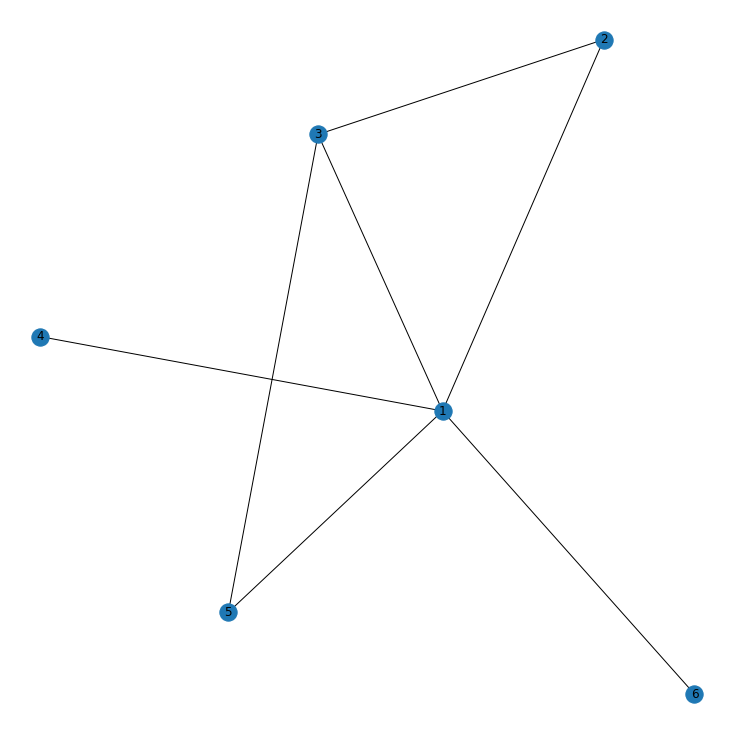

In [5]:
eksempelgraf = Graph()
eksempelgraf.add_node(1)
eksempelgraf.add_nodes_from([2, 3, 4, 5, 6])
eksempelgraf.add_edge(1, 5)
eksempelgraf.add_edges_from([(1, 3), (1, 2), (5, 3), (3, 2), (1, 4), (1, 6)])
eksempelgraf.draw()

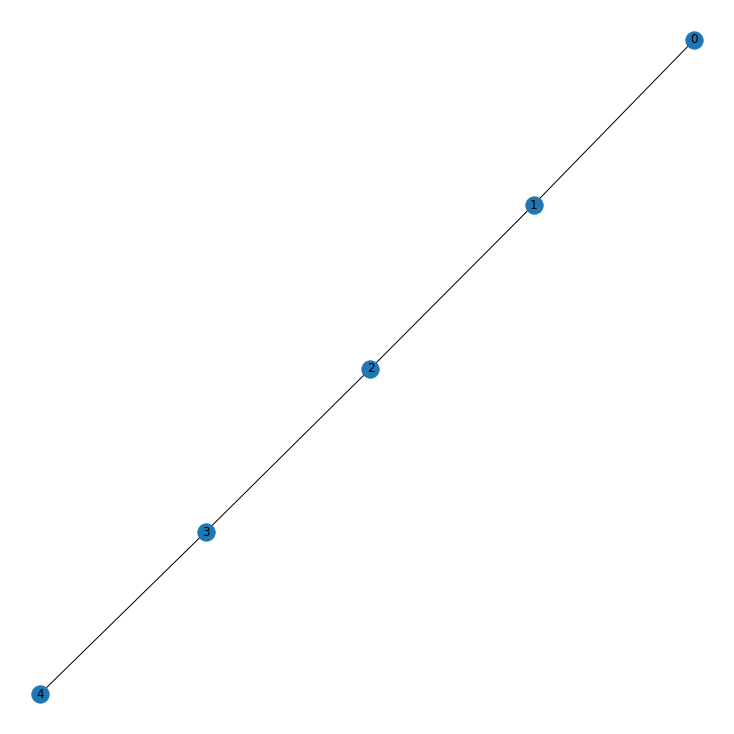

In [6]:
#Bus
buss = BussGraph(5)
buss.draw()

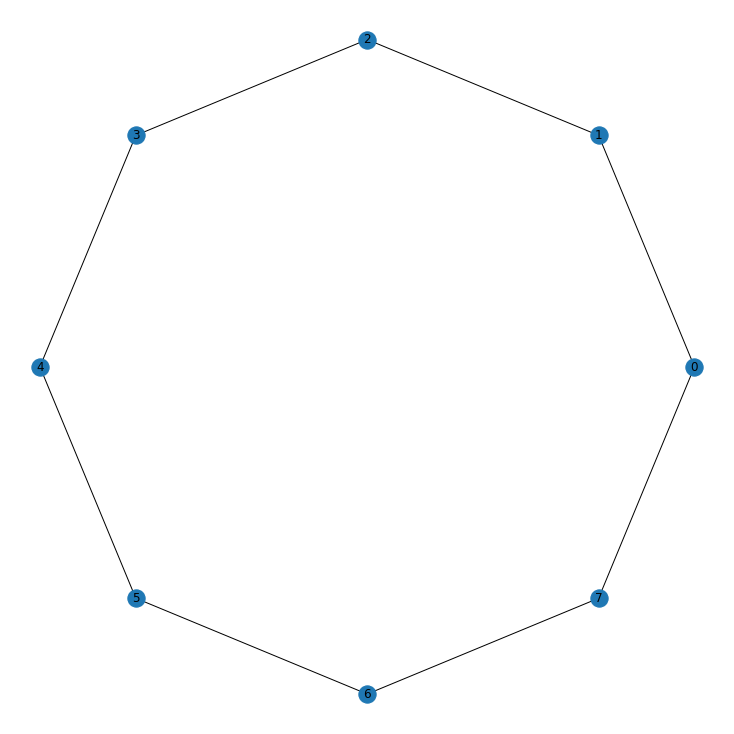

In [7]:
#Ring
ring = RingGraph(8)
ring.draw()

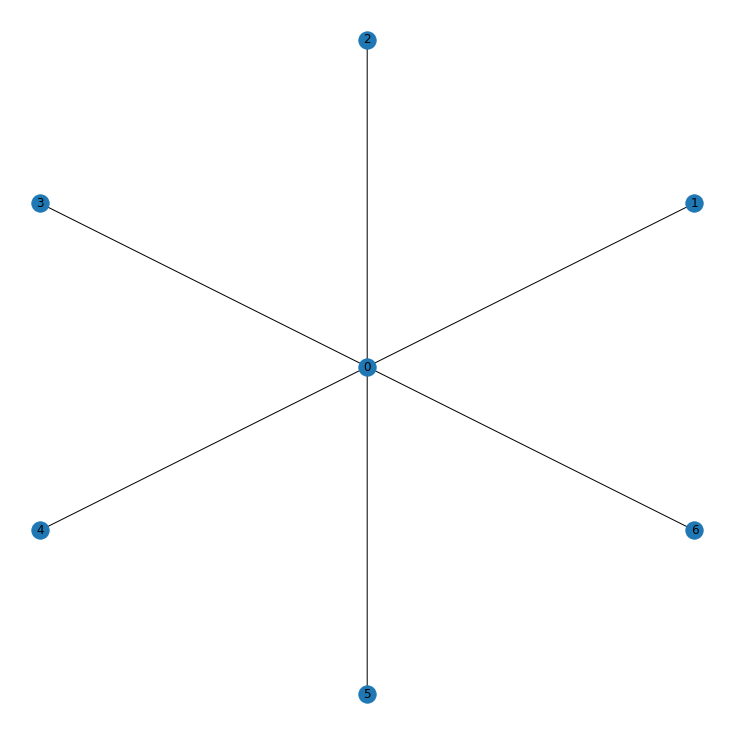

In [8]:
#Star
star = StarGraph(6)
star.draw()

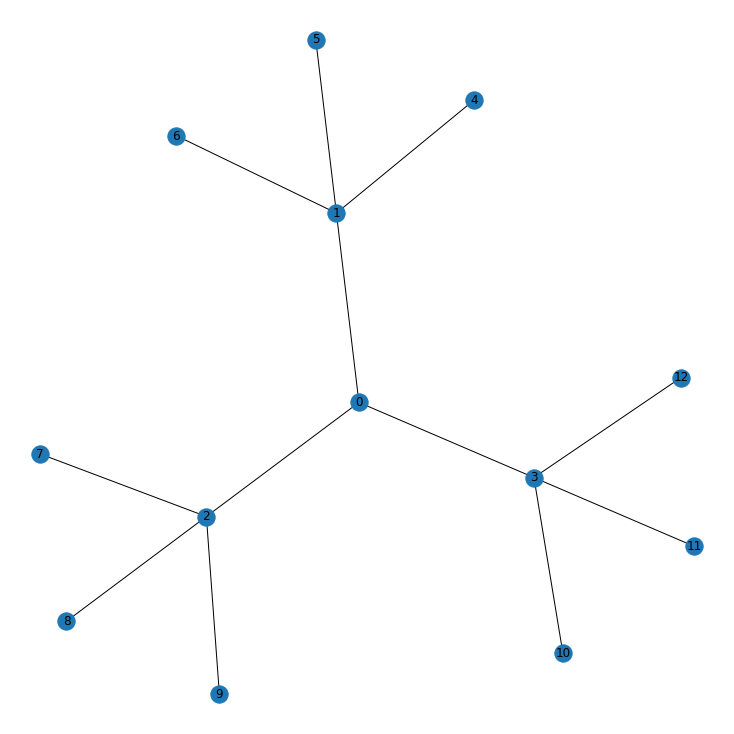

In [9]:
#Tree
tree = TreeGraph(3, 2)
tree.draw()

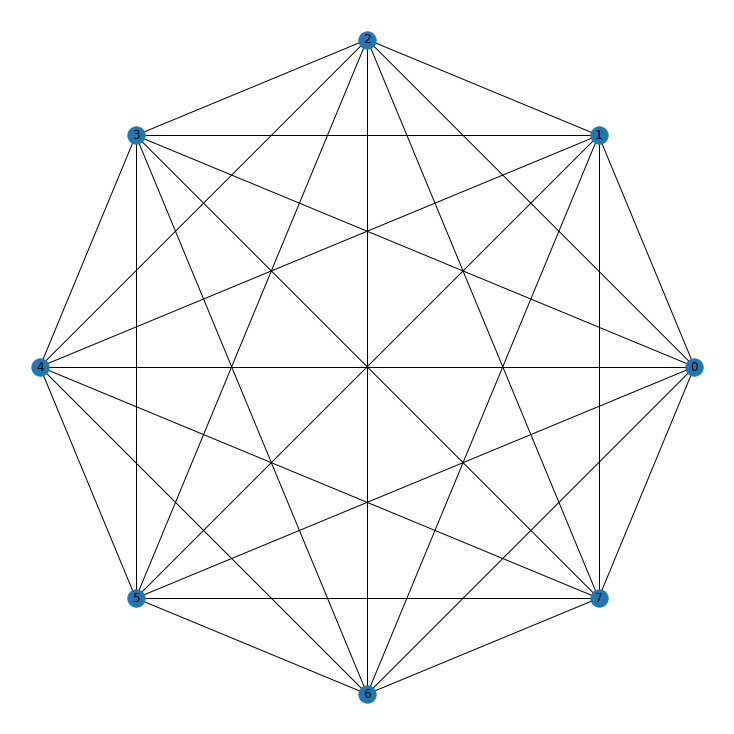

In [10]:
#Mesh
mesh = MeshGraph(8)
mesh.draw()

## Oppgave 1.2
For hver av strukturene gitt i oppgave 1.1, kom med et eksempel fra virkeligheten som bruker denne strukturen. For hver av strukturene, kommenter hva som er styrker og svakheter.

<em> For hver graf forventer vi å se minst ett eksempel på hvor denne strukturen brukes. Vi forventer også en kort drøftning på styrker og svakheter </em>

#### Skriv svar her:
* Bus: Transatlantisk fiber kabel med reapetere. Veldig enkel graf som er lett å implimentere, men grafen er ikke spesielt robust med "a sigel point  
* Ring: Zen 3 CPU arkitektur for å koble sammen chiplets til L3-cash. Ring Bus gjør at det krever få "ledninger" for å koble alle kjernene sammen, men samtidig er ikke alle kjerne koblet direkte til hverande, noe som påvirker ytelsen negativt  
* Star: Lokalt nettverk hvor ruteren representerer center noden. Dette gir ofte nettverk med en 'master' node, noe som kan gjøre systemet sårbart ettersom nettverket er avhengig av en enkelt node. På den andre siden er det lett å sende data til de andre nodene ettersom senternoden er koblet til alle andre nodene, samtidig som det ikke er behov for likemange koblinger som mesh.
* Tree: 
* Mesh: Som Ring, brukes også mesh til å koble sammen kjerner. Ved mesh er alle noder/kjerner koblet til alle andre noder og det vil derfor være minimal forsinkelse. I tillegg er mesh robust pga det store antallet koblinger mellom nodene. Desverre er de mange koblingene også en ulempe. Koblinger koster ofte resurser og tar opp plass.  


## Oppgave 1.3
For hver graf, finn noden med høyest degree centrality for hånd. Vis utregning og forklar viktigheten en node med høy degree centrality tilføyer nettverket.

<em> Her forventer vi å se at man har forstått seg på hva begrepet degree centrality handler om, og funnet den viktigste noden. Vi forventer også å se utregning og at studenten ikke har funnet svaret med å bruke en metode. Til slutt forventer vi en kort kommentar på hvorfor denne noden er viktig.</em>

C_d(v) = deg(v)

# Bus
For endepunktene 0 og 4:  
C_d(0) = C_d(4) = 1 ettersom nodene kun er koblet direkte til en annen node  

For nodene i midten 1,2 og 3  
C_d(1) = C_d(2) = C_d(3) = 2  

# Ring  
Alle nodene er koblet til like mange andre node og de har dermed lik C_d  
C_d(all) = 1 + 1 = 2

# Star  
C_d(0) = 1*6 = 6 (centernode)  
C_d(1) = C_d(2) = C_d(3) = C_d(4) =C_d(5) = 1  (ytre noder)

# Tree  
C_d(0) = 3  
C_d(1) = C_d(2) = C_d(3) = 4  
C_d(4) = C_d(5) ... C_d(11) = C_d(12) = 1 


# Mesh    
Alle noder er koblet til alle andre noder og vil derfor ha samme C_d gitt ved  
C_d = #noder - 1 = 8-1 = 7  (-1 kommer fra at noden ikke kan være koblet til seg selv)  

## Oppgave 1.4
For hver graf, finn noden med høyest betweenness centrality for hånd. Vis utregning og forklar viktigheten en node med høy degree centrality tilføyer nettverket.

<em> Her forventer vi å se at man har forstått seg på hva begrepet betweenness centrality handler om, og funnet den viktigste noden. Vi forventer også å se utregning og at studenten ikke har funnet svaret med å bruke en metode. Til slutt forventer vi en kort kommentar på hvorfor denne noden er viktig</em>

Betweeness_centrality = $\Sigma_{s \neq v \neq t} \frac{\sigma_{st}(v)}{\sigma}$  

### Buss
betweeness_centrality_node_0 = $\frac{0}{6} = 0$  
betweeness_centrality_node_1 = $\frac{3}{6} = 0.5$  
betweeness_centrality_node_2 = $\frac{4}{6} = 0.66$  
betweeness_centrality_node_3 = $\frac{3}{6} = 0.5$  
betweeness_centrality_node_4 = $\frac{0}{6} = 0$  

In [16]:
buss.betweenness_centrality()

{0: 0.0, 1: 0.5, 2: 0.6666666666666666, 3: 0.5, 4: 0.0}

### Ring
Alle noder vil være like ettersom grafen ser lik ut fra alle noders perspektiv:

betweeness_centrality = $\frac{6}{4\cdot7}$
betweeness_centrality = $\frac{3}{14}$
betweeness_centrality = $0.214$

### Star

Ytterste noder vil ikke inkluderes i noen av de korteste veiene:
betweeness_centrality =$\frac{0}{4+3+2+1} = 0$


Midterste node vil inkluderes i alle korteste veier:
betweeness_centrality =  $\frac{4+3+2+1}{4+3+2+1} = 1$

Ikke overraskende har centernoden høyest centrality

In [17]:
star.betweenness_centrality()

{0: 1.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0}

### Tree

Ytterste noder vil ikke inkluderes i noen av de korteste veiene:
$C_b(4, 5, 6, 7, 8, 9, 10, 11, 12)=0$

$C_b(1, 2, 3)=\frac{0}{12\cdot3}$


In [18]:

# tree.betweenness_centrality()
# tree.mark_shortest_path(1, 2)


### Mesh

Alle korteste veier er direkte og hver node vil dermed aldri del av en annen korteste vei 

$C_b(all)=\frac{0}{7+6+5+4+3+2+1} = 0$


In [19]:
len(mesh.edges())

28

## Oppgave 1.5
For hver graf, finn noden med høyest closeness centrality for hånd. Vis utregning og forklar viktigheten en node med høy degree centrality tilføyer nettverket.

<em> Her forventer vi å se at man har forstått seg på hva begrepet closeness centrality handler om, og funnet den viktigste noden. Vi forventer også å se utregning og at studenten ikke har funnet svaret med å bruke en metode. Til slutt forventer vi en kort kommentar på hvorfor denne noden er viktig</em>

Clossness centrality gir et mål på hvor nærme hver node et til alle andre. 

Vi har at
Closness=$\frac{n-1}{\sum_{j\ne i}(d_{i, j})}$

### Mesh
Closness=$\frac{8-1}{1\cdot7}$

Closness=$\frac{7}{7}$

Closness=$1$

### Bus
Closness_node_0 = $\frac{5-1}{4+3+2+1} = \frac{4}{10}$ = 0.4  
Closness_node_1 = $\frac{5-1}{3+2+1+1} = \frac{4}{7}$ = 0.57  
Closness_node_2 = $\frac{5-1}{2+1+1+2} = \frac{4}{6}$ = 0.66  
Closness_node_3 = $\frac{5-1}{3+2+1+1} = \frac{4}{7}$ = 0.57   
Closness_node_4 = $\frac{5-1}{4+3+2+1} = \frac{4}{10}$ = 0.4  

Node 2 har høyest closness i grafen

### Ring

Her vil alle noder ha samme closness centrality:

Closness=$\frac{8-1}{2\cdot1+2\cdot2+2\cdot3+2\cdot4}$


Closness=$\frac{7}{20}$

Vi har altså ikke en node som er viktigst, da alle har lik relasjon til hverandre. 

### Star

For alle ytter noder:
Closness=$\frac{6-1}{5\cdot2+1}$

Closness=$\frac{5}{11}$

Node i midten:
Closness=$\frac{6-1}{1\cdot5}$

Closness=$\frac{5}{5}$

Closness=$1$

Noden i midten er mest sentral, kobles denne fra vil alle andre noder miste forbindelse

### Tree

Vi kalkulerer fra node i midten ut til en gren med neste nodesett, da hver av disse settene vil ha lik Closness.

Node i midten:
Closness=$\frac{13-1}{3\cdot1+3\cdot3\cdot2}$
Closness=$\frac{4}{7}$

Node en ut fra midten:
Closness=$\frac{13-1}{1+3\cdot1+2\cdot2+6\cdot3}$
Closness=$\frac{6}{13}$

Node ytterst:
Closness=$\frac{13-1}{1+3\cdot2+2\cdot3+6\cdot4}$
Closness=$\frac{12}{37}$

Ikke overaskende ser vi at midterste node har høyest closness, faller denne ut vil hver av yttersste nodene isoleres fra hverandre. 

## Oppgave 1.6
Degree distribution kan vises med et histogram. Hva er degree distribution og hvorfor er det logisk å se på det med et histogram?

For hver av grafene, lag et histogram over degree distribution og kommenter hva du ser.

* Bruk metoden <code>histogram()</code> for å gjøre dette

<em> VI forventer å se at studenten har skjønt hva et degree distribution representerer og bruken av denne. I tillegg forventer vi et histogram per graf, med en kort kommentar på hva dette histogrammet forteller om grafen </em>

Degree distrobution sier noen om fordelingen antall nodetilkoblinger på de ulike nodene i grafen er.

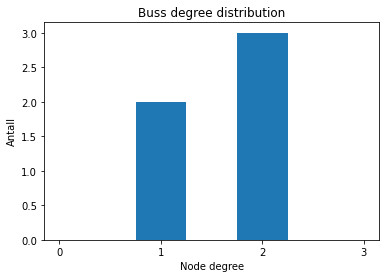

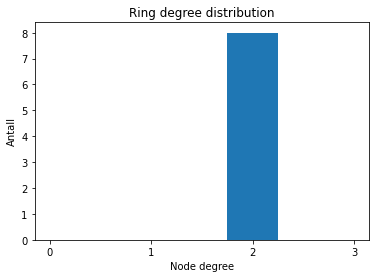

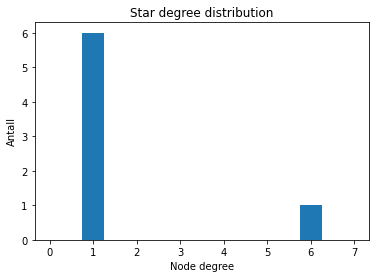

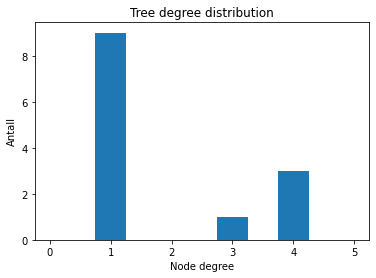

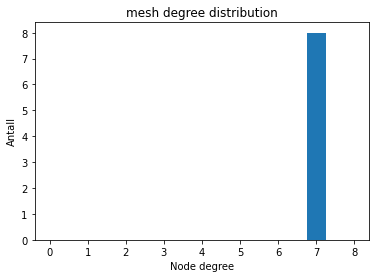

[0, 0, 0, 0, 0, 0, 0, 8]

In [20]:
#Lag alle histogrammene under

plt.title('Buss degree distribution')
buss.histogram()

plt.title('Ring degree distribution')
ring.histogram()

plt.title('Star degree distribution')
star.histogram()

plt.title('Tree degree distribution')
tree.histogram()

plt.title('mesh degree distribution')
mesh.histogram()


In [21]:
#Kommenter foreldingen av node degrees som vises i histogrammene her:



# Del 2: Strukturanalyse
I denne delen skal vi introdusere flere grafstrukturer. Disse grafstrukturene er mer komplekse, men gjenspeiler bedre relle nettverk. <br/> <em>Et tips her er å bruke seed=student_seed for å få samme graf her gang.</em>

## Oppgave 2.1

Lag følgende 4 grafer, alle med 100 noder:

    Graf 1: En Barabasi Albert graf med parameter m=1
    Graf 2: En Barabasi Albert graf med parameter m=2
    Graf 3: En Watts Strogatz graf med parametre k=2 og p=0.1
    Graf 4: En Watts Strogatz graf med parametre k=4 og p=0.1

For hver av grafene, tegn de og lag et histogram over degree distribution.

<em> Her forventer vi at de fire grafene blir konstruert og printet. Vi forventer også å se et histogram for hver graf</em>

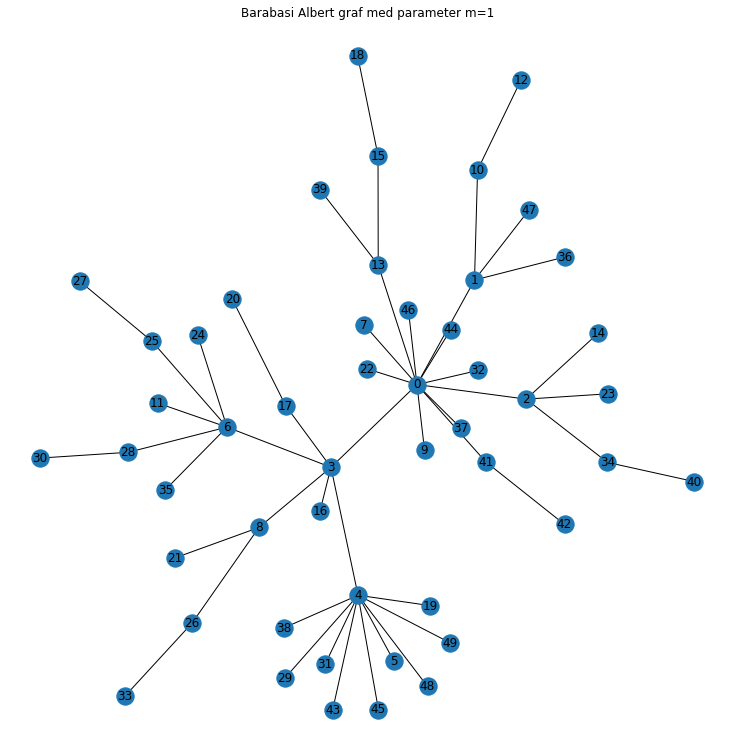

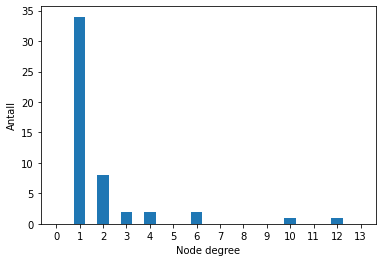

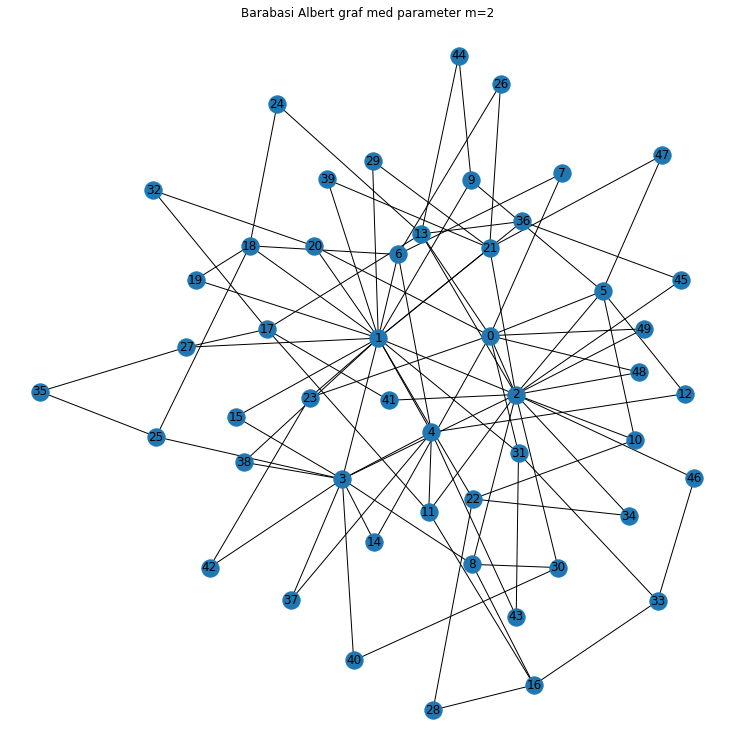

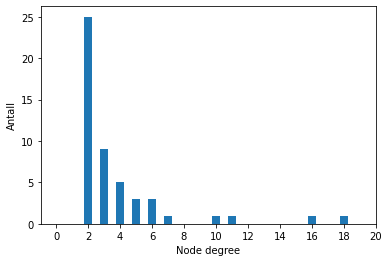

[0, 0, 25, 9, 5, 3, 3, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]

In [22]:
#Kode her

ba1 = BarabasiAlbert(n=50, m=1, seed = student_seed)
ba1.draw()
plt.title('Barabasi Albert graf med parameter m=1')
plt.show()
ba1.histogram()

ba2 = BarabasiAlbert(n=50, m=2, seed = student_seed) 
ba2.draw()
plt.title('Barabasi Albert graf med parameter m=2')
plt.show()
ba2.histogram()

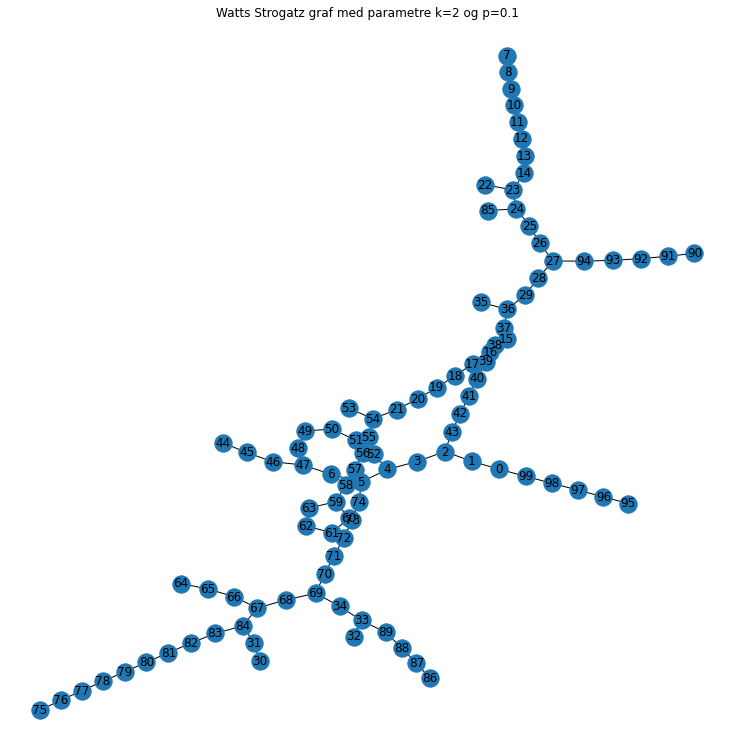

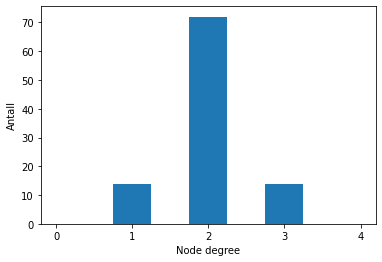

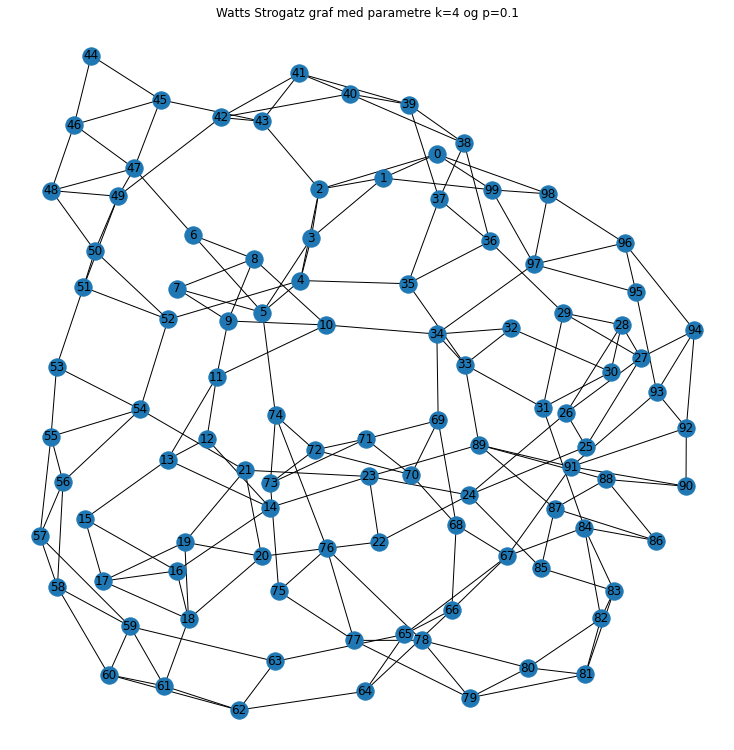

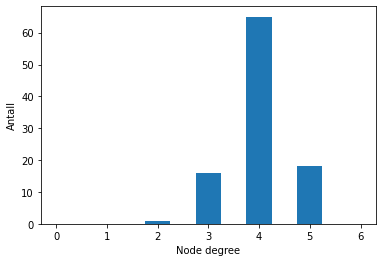

[0, 0, 1, 16, 65, 18]

In [23]:
ws2 = WattsStrogatz(100, 2, 0.1, seed = student_seed)
ws2.draw()
plt.title('Watts Strogatz graf med parametre k=2 og p=0.1')
plt.show()
ws2.histogram()

ws4 = WattsStrogatz(100, 4, 0.1, seed = student_seed)
ws4.draw()
plt.title('Watts Strogatz graf med parametre k=4 og p=0.1')
plt.show()
ws4.histogram()

## Oppgave 2.1.1
Kommenter histogrammene over på hensyn av eventuelle styrker og sårbarheter de forskjellige grafene har

<em> Her forventer vi en sammenhengende tekst der man ser på likheter og forskjeller mellom de forskjellige grafene, med fokus på styrker og sårbarheter </em>

In [24]:
# Forklaring her:




## Oppgave 2.1.2
Konstruer et nettverk bestående av mellom 9 og 15 noder, med en node som har høyest betweenness centrality, og en av de laveste degree centrality

<em> Her forventer vi at studenten holder seg innenfor grensen på 9-15 noder, samt har konstruert en graf der en node har høyest betweenness centrality, men også en av de laveste degree centralitiene</em>

Text(0.5, 1.0, 'degree centrality')

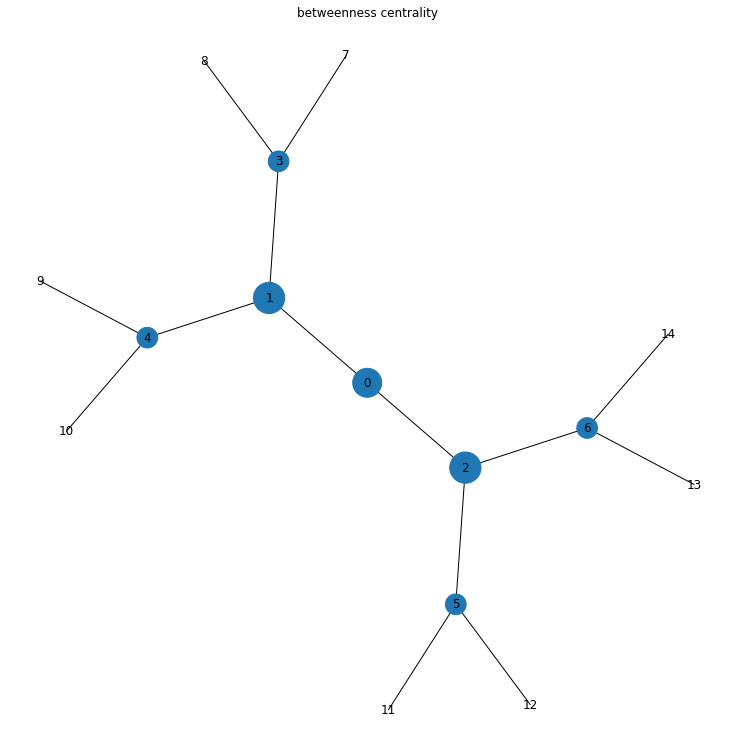

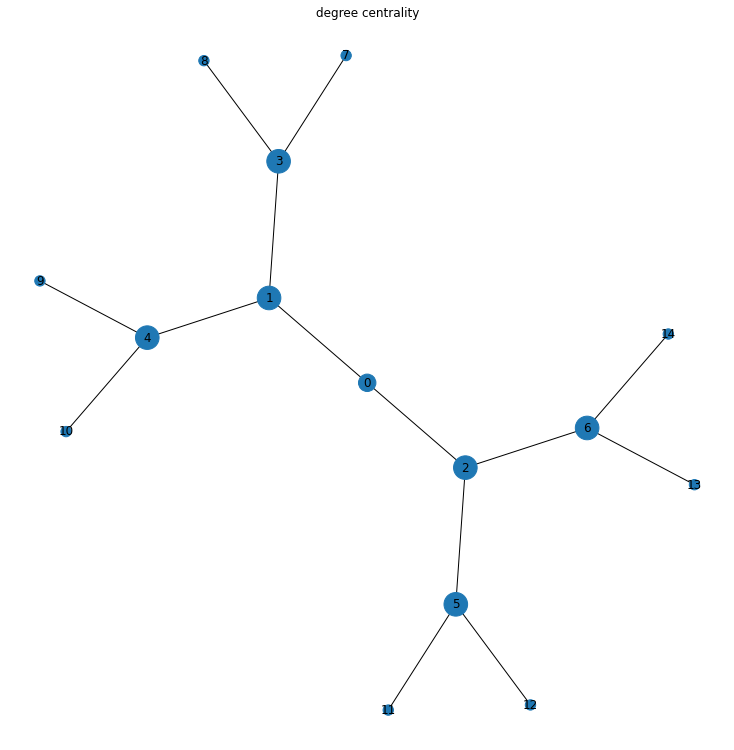

In [25]:
#Kode her


custom_graf = TreeGraph(2,3)
# custom_graf.add_node(1)
# custom_graf.add_nodes_from([2, 3, 4, 5, 6])
# custom_graf.add_edge(1, 5)
# custom_graf.add_edges_from([(1, 3), (1, 2), (5, 3), (3, 2), (1, 4), (1, 6), (3, 6)])
# custom_graf.draw()
custom_graf.betweenness_centrality()
custom_graf.draw_betweenness_centrality()
plt.title('betweenness centrality')
custom_graf.draw_degree_centrality()
plt.title('degree centrality')

## Oppgave 2.2

In [26]:
networkURL = get_network(student_seed)
# Du kan bruke variabelen networkURL som parameter i RealNetworkGraph
# Ved å bruke student_seed vil metoden hente samme nettverk hver gang

You will analyze the Garr201101 network.
Your network graph file is http://www.topology-zoo.org/files/Garr201101.graphml



I denne oppgaven skal vi analysere et ekte nettverk. Klassen <code>RealNetworkGraph()</code> tar inn en url av en fil med filtypen .graphml. Lag et objekt for nettverket du får i koden over og tegn det. Filene som kan analyseres finnes på nettsiden www.topology-zoo.org/dataset.html. Funksjonen over henter ut en ".graphml" fil du kan bruke, du kan eventuelt hente den ut selv og se på andre ved å se på nettsiden.

<em> Her forventer vi å se at studenten klarer å hente ut grafen som er blitt tildelt, konstruerer den og viser den frem i cellen nedenfor. </em>

In [27]:
# Konstruer og tegn nettverket her
real_graph = RealNetworkGraph(networkURL)

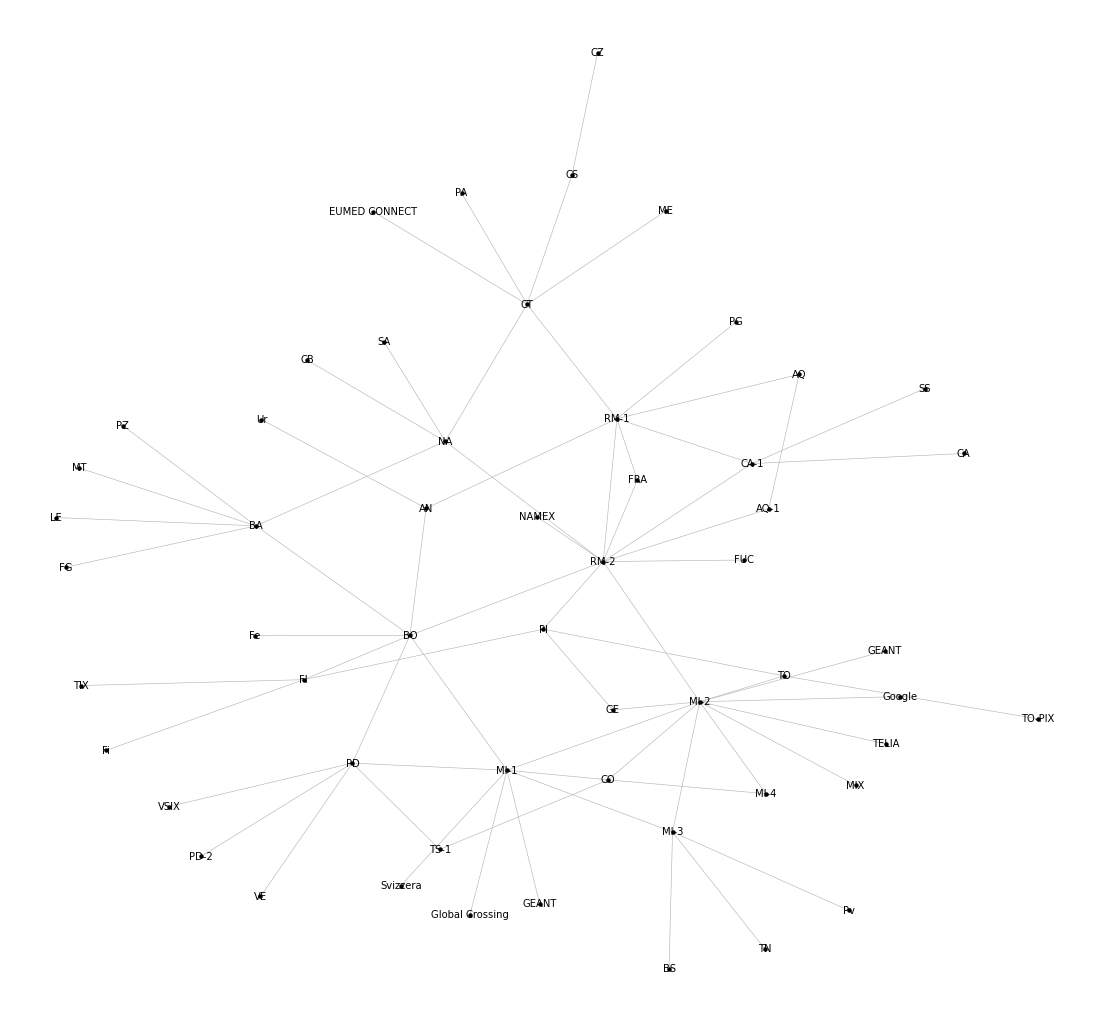

In [28]:
real_graph.draw()

## Oppgave 2.2.1
Plott et histogram over degree distribution for nettverket over. Hva forteller histogrammet deg?

<em> Her forventer vi å se et histogram og en tekst om hva histogrammet forteller. Her kan det være lurt å blande inn histogrammer fra tidligere oppgaver, og bruke disse til å drøfte det reelle nettverket. </em>

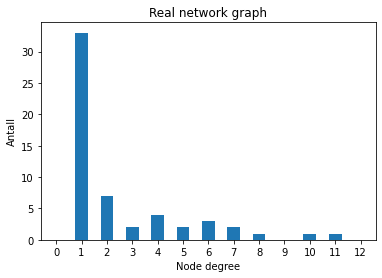

[0, 33, 7, 2, 4, 2, 3, 2, 1, 0, 1, 1]

In [29]:
#Kode og forklaring her
plt.title('Real network graph')
real_graph.histogram()

Fra histogrammet ser vi at node 1 er mest direkte oppkoblinger og dermed også høyest kompleksitet med hensyn på dette. 

## Oppgave 2.2.2
Under er det oppgitt en funksjon for å gi ut hvilke noder som er viktigst med de tre funksjonalitetene. Bruk funksjonen på grafen.
Er noen noder viktig i flere av sentralitetene? Hvorfor?

<em> Her forventer vi at studenten klarer å bruke metoden som er gitt, til å finne de viktigste nodene i hver kategori. Deretter forventer vi at studenten klarer å finne noder som er viktige i flere kategorier, og drøfter kort rundt dette.</em>

In [30]:
def get_centrality_table(graph):
    deg= graph.degree_centrality()
    cls = graph.closeness_centrality()
    betw = graph.betweenness_centrality()
    lst = [deg,cls,betw]
    for i,obj in enumerate(lst):
        values = [(graph.nodes[k]["label"],v) for k, v in sorted(obj.items(), key=lambda item: item[1])]
        values.reverse()
        lst[i] = values
    print("\nCentrality Indexer,\n-sortert i synkende rekkefølge\n")
    print("\033[1m" + "Degree".ljust(20) + "Closeness".ljust(20) + "Betweenes".ljust(20) + '\033[0m')
    for deg,cls,betw in zip(*lst):
        print(deg[0].ljust(20) + cls[0].ljust(20) + betw[0].ljust(20))


In [31]:
#Kode her
get_centrality_table(real_graph)


Centrality Indexer,
-sortert i synkende rekkefølge

Degree              Closeness           Betweenes           
MI-2                RM-2                RM-2                
RM-2                BO                  BO                  
MI-1                MI-2                MI-2                
BO                  MI-1                MI-1                
RM-1                NA                  NA                  
BA                  RM-1                CT                  
PD                  BA                  RM-1                
CT                  PD                  BA                  
NA                  AN                  PD                  
MI-3                CA-1                MI-3                
PI                  PI                  FI                  
CO                  MI-3                CA-1                
FI                  FRA                 AN                  
CA-1                CO                  PI                  
AN                  FI          

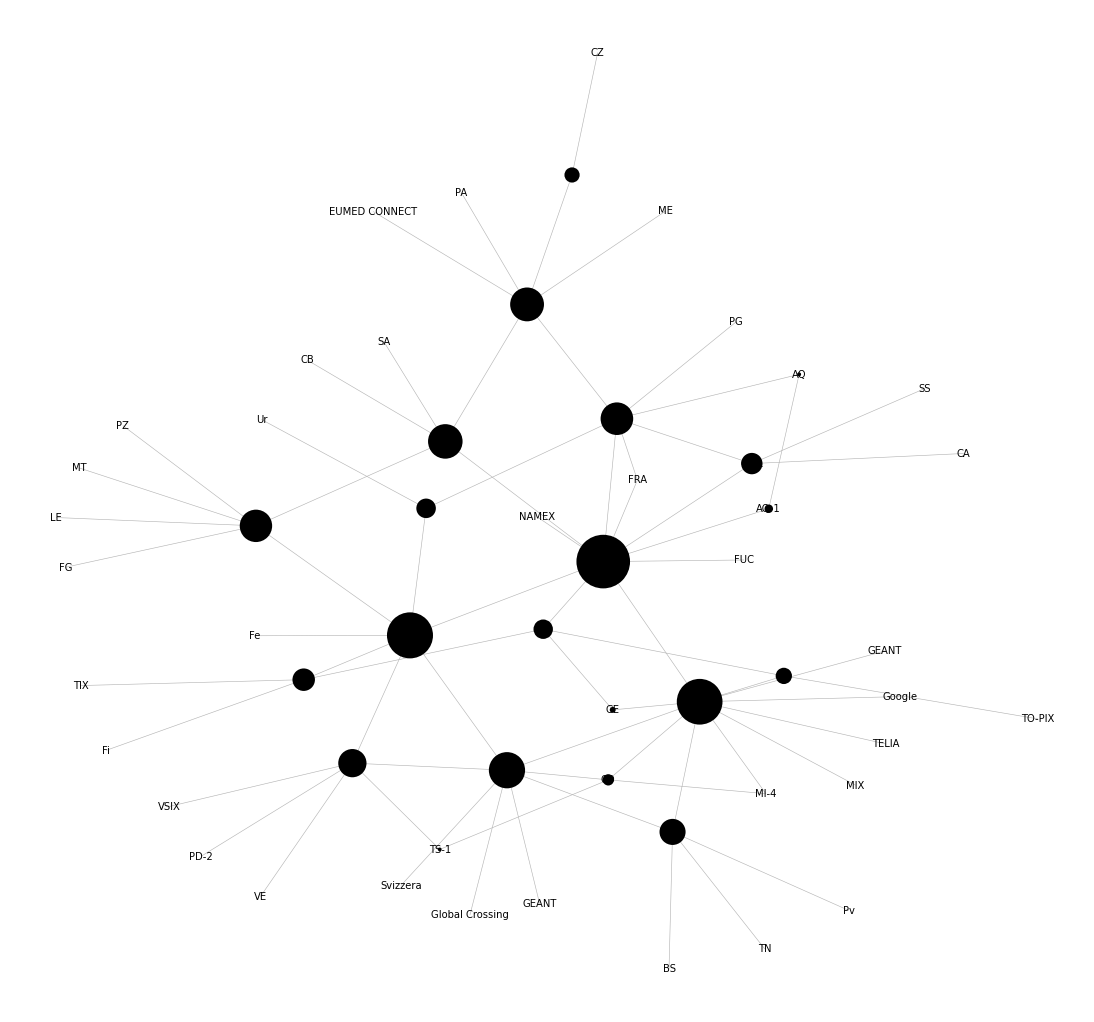

In [32]:
real_graph.draw_betweenness_centrality()

Vi ser at RM-2 har både høyest $C_b$ og $C_c$, mens MI-2 har høyest $C_d$. Dette viser at til tross for høyere kompleksitet på tilkoblinger opp mot MI-2, vil RM-2 være viktigere å beskytte da større deler av nettverket vil gå ned dersom denne faller ut. 

## Oppgave 2.3
<code>ConstructedGraph()</code> simulerer et reelt nettverk, bestående av et kjernenett med grid-struktur, et regionalnett og et tettbebygd aksessnett. Bruk klassen og tegn grafen.

For hver av de tre centralitiene, finn de mest sentrale nodene og tegn de. Hvor ligger de viktigste nodene, og hvordan ville du beskrevet robustheten til regionalnettet?

<em> Her forventer vi at studenten klarer å bruke ConstructedGraph() til å printe ut et reelt nettverk, og at studenten skjønner hvilke deler dette nettverket er bygget opp av. Deretter forventer vi at studenten viser de mest sentrale nodene innenfor hver kategori, forteller hvor i grafen de ligger, og drøfter robustheten til regionalnettet.  </em>

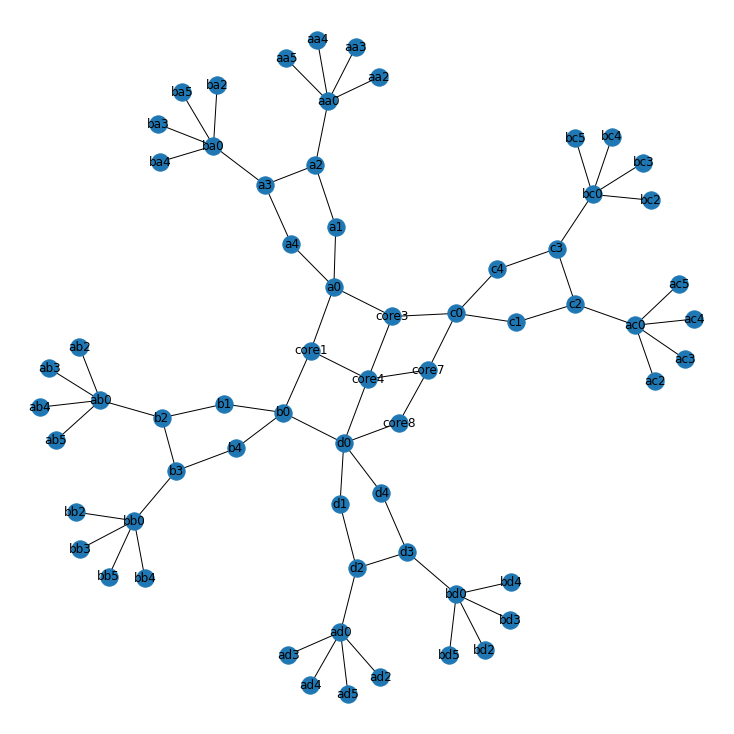

In [48]:
#Kode her
constructed_graph = ConstructedGraph()
constructed_graph.draw()

Vi finner de viktigste nodene ved å se på hvilke som har følger til at størst del av nettverket blir isolert dersom den faller ut på de ulike nivåene i nettverket. Disse kan vi finne ved å se på closness og betweenness of centrality.

In [53]:
print(constructed_graph.betweenness_centrality())

{'a0': 0.3715277777777776, 'core1': 0.26289682539682546, 'b0': 0.3900462962962963, 'core3': 0.2628968253968253, 'core4': 0.26455026455026454, 'd0': 0.42658730158730157, 'c0': 0.35185185185185186, 'core7': 0.14831349206349206, 'core8': 0.062003968253968256, 'a1': 0.15178571428571427, 'a2': 0.14930555555555555, 'a3': 0.14930555555555555, 'a4': 0.15178571428571427, 'b1': 0.15178571428571427, 'b2': 0.14930555555555555, 'b3': 0.14930555555555555, 'b4': 0.15178571428571427, 'c1': 0.15178571428571427, 'c2': 0.14930555555555555, 'c3': 0.14930555555555555, 'c4': 0.15178571428571427, 'd1': 0.15178571428571427, 'd2': 0.14930555555555555, 'd3': 0.14930555555555555, 'd4': 0.15178571428571427, 'aa0': 0.12202380952380952, 'aa2': 0.0, 'aa3': 0.0, 'aa4': 0.0, 'aa5': 0.0, 'ab0': 0.12202380952380952, 'ab2': 0.0, 'ab3': 0.0, 'ab4': 0.0, 'ab5': 0.0, 'ac0': 0.12202380952380952, 'ac2': 0.0, 'ac3': 0.0, 'ac4': 0.0, 'ac5': 0.0, 'ad0': 0.12202380952380952, 'ad2': 0.0, 'ad3': 0.0, 'ad4': 0.0, 'ad5': 0.0, 'ba0': 

Viktigste for kjernenettet 

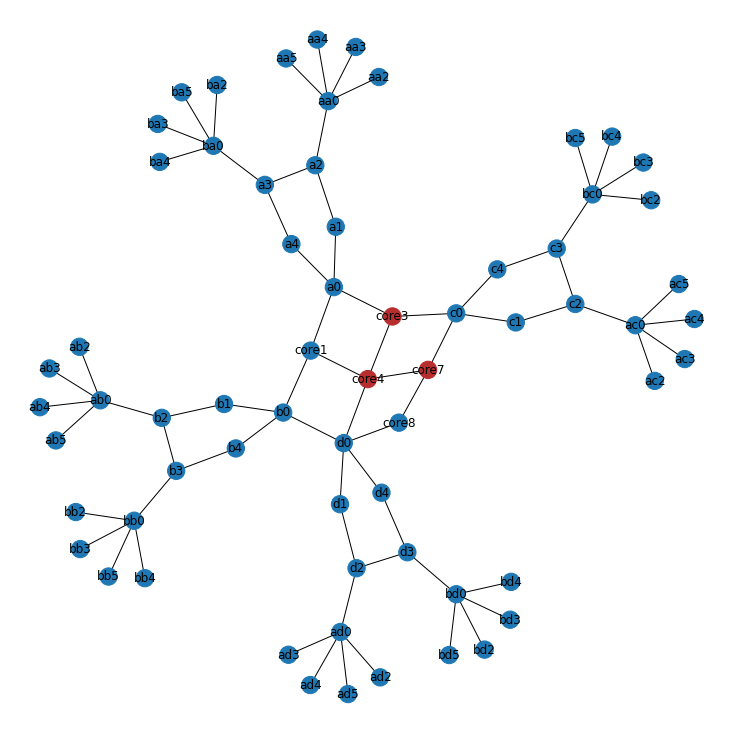

In [54]:
constructed_graph.mark_nodes(['core3', 'core4', 'core7'])

Viktigste for regionalnettet 

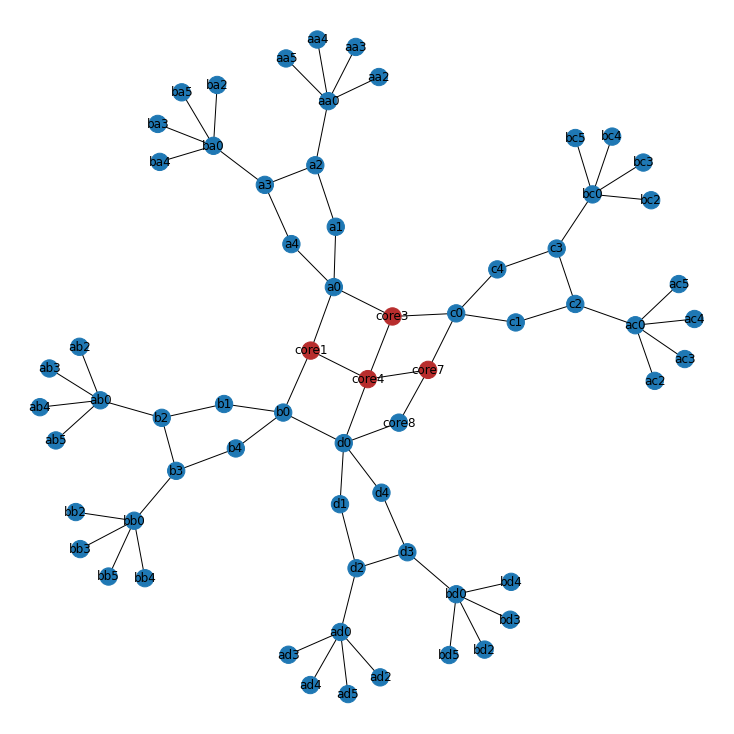

In [44]:
constructed_graph.mark_nodes(['a0', 'c0', 'd0', 'b0'])

Viktigste for aksessnettet

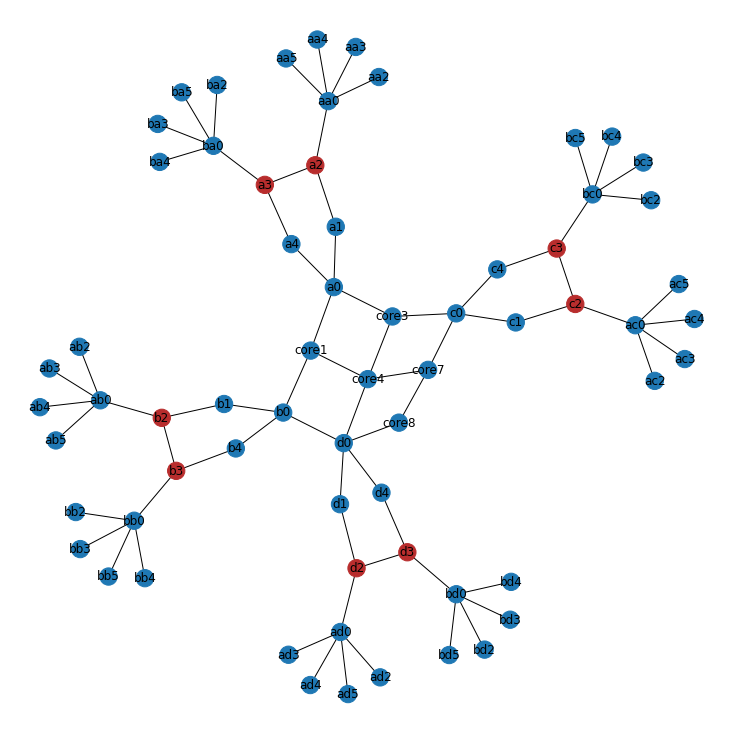

In [47]:
constructed_graph.mark_nodes(['b2', 'b3', 'd2', 'd3', 'c2', 'c3', 'a3', 'a2']) # litt usikker på om nodene under disse er mer korrekt

# Del 3: Angrep og robusthet
Her skal vi analysere og diskutere det simulerte nettverket fra oppgave 2.3 i dybden. I denne oppgaven vil vi bruke en utvidet versjon av nettverket.<br/>
Kjør cellen for å generere nettverket

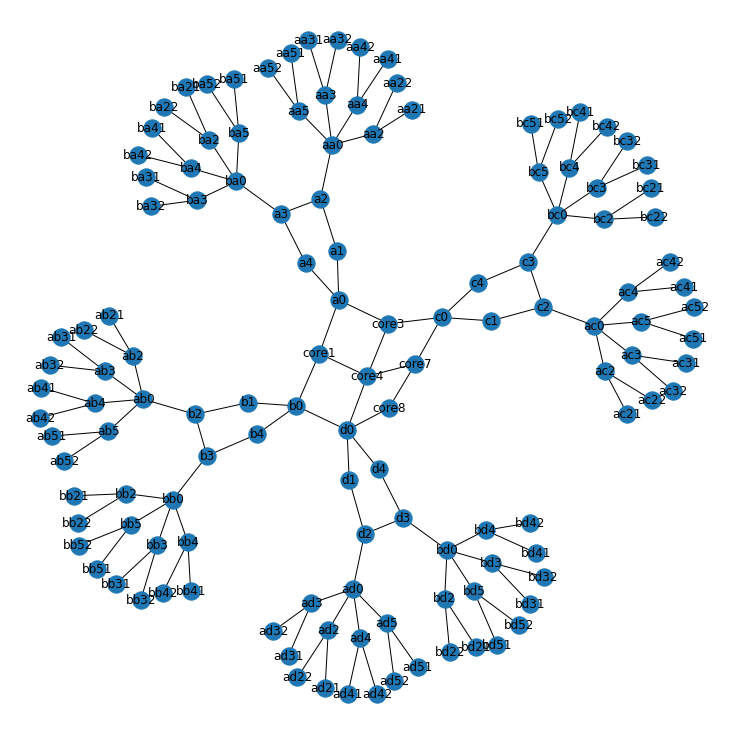

In [172]:
cg = ConstructedGraph(expanded=True)
cg.draw()

## Oppgave 3.1
Bruk de numeriske verdiene for de forskjellige centrality-målene for å finne hvilke noder i nettverket som er viktigst. Er det noen av nodene som overrasker deg?

<em> Her forventer vi å se at studenten bruker metoder som tidligere har blitt introdusert, til å finne de viktigste nodene i grafen. Deretter forventer vi å se en kort drøftende tekst på hvilke noder dette gjelder.</em>

In [107]:
def sort_dict_by_decending(dict):
    return sorted(dict.items(), key=lambda item: item[1], reverse=True)[:16]

In [136]:
#Kode og forkaring her

print('degree_centrality:')
print(sort_dict_by_decending(cg.degree_centrality()))
print('closeness_centrality:')
print(sort_dict_by_decending(cg.closeness_centrality()))
print('betweenness_centrality:')
print(sort_dict_by_decending(cg.betweenness_centrality()))

degree_centrality:
[('d0', 0.0390625), ('aa0', 0.0390625), ('ab0', 0.0390625), ('ac0', 0.0390625), ('ad0', 0.0390625), ('ba0', 0.0390625), ('bb0', 0.0390625), ('bc0', 0.0390625), ('bd0', 0.0390625), ('a0', 0.03125), ('b0', 0.03125), ('core4', 0.03125), ('c0', 0.03125), ('core1', 0.0234375), ('core3', 0.0234375), ('core7', 0.0234375)]
closeness_centrality:
[('core4', 0.17827298050139276), ('core1', 0.17753120665742025), ('core3', 0.17753120665742025), ('d0', 0.17753120665742025), ('a0', 0.17679558011049723), ('b0', 0.17679558011049723), ('core7', 0.16389244558258642), ('c0', 0.16326530612244897), ('core8', 0.16326530612244897), ('d1', 0.1588089330024814), ('d4', 0.1588089330024814), ('a1', 0.15822002472187885), ('a4', 0.15822002472187885), ('b1', 0.15822002472187885), ('b4', 0.15822002472187885), ('c1', 0.1472957422324511)]
betweenness_centrality:
[('d0', 0.4325787401574803), ('b0', 0.40383038057742754), ('a0', 0.3841453412073491), ('c0', 0.36384514435695536), ('core1', 0.26697834645669

In [137]:
sort_dict_by_decending(cg.degree_centrality())

[('d0', 0.0390625),
 ('aa0', 0.0390625),
 ('ab0', 0.0390625),
 ('ac0', 0.0390625),
 ('ad0', 0.0390625),
 ('ba0', 0.0390625),
 ('bb0', 0.0390625),
 ('bc0', 0.0390625),
 ('bd0', 0.0390625),
 ('a0', 0.03125),
 ('b0', 0.03125),
 ('core4', 0.03125),
 ('c0', 0.03125),
 ('core1', 0.0234375),
 ('core3', 0.0234375),
 ('core7', 0.0234375)]

We mark the 16 most important nodes.

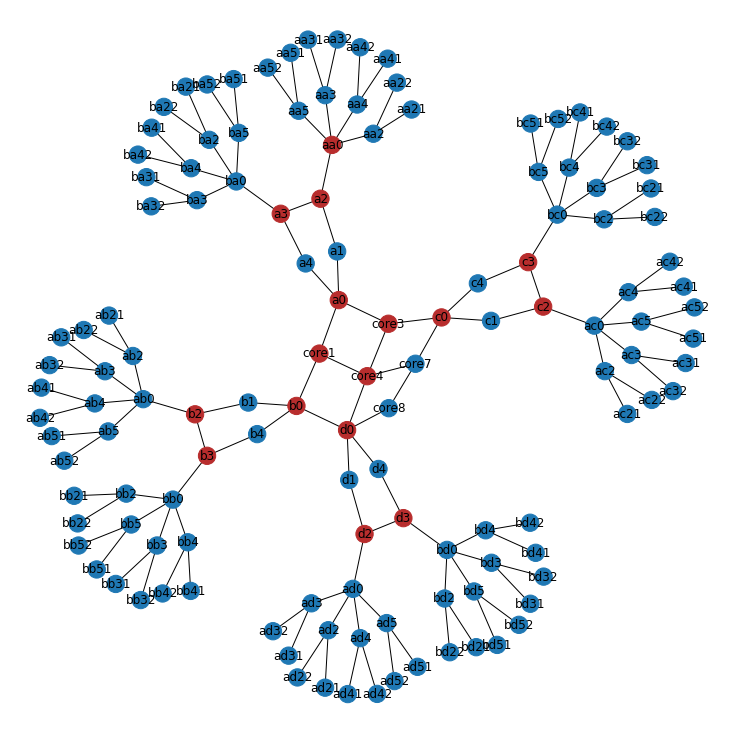

In [141]:
d = cg.betweenness_centrality()
cg_sorted =  [w for w in sorted(d, key=d.get, reverse=True)]

cg.mark_nodes(cg_sorted[:16])

Resulatet over er ikke særlig uforventet, men noe overaskende er at core8 og core7 er mindre viktige enn dem i regionalnettet. 

## Oppgave 3.2
Bruk metoden <code>delete_random_nodes</code> for å simulere tilfeldige feil som kan skje i nettverket.
* Fjern en node. Tegn så grafen
* Fjern tre noder. Tegn så grafen

Kommenter skaden av nettverket

<em> Her forventer vi å se at studenten klarer å printe ut to forskjellige grafer, en der en node er fjernet og en der tre noder er fjernet. Disse nodene skal være fjernet ved å bruke delete_random_nodes. Forventer også et kort analyse over nettverket, og drøftning av skaden disse feilene påførte nettverket. Her kan man dra inn metoder tidligere brukt</em>

Removed node core3 using random_fault
Removed node core3 using random_fault
Removed node bd21 using random_fault
Removed node b3 using random_fault


Text(0.5, 1.0, '3 random nodes deleted')

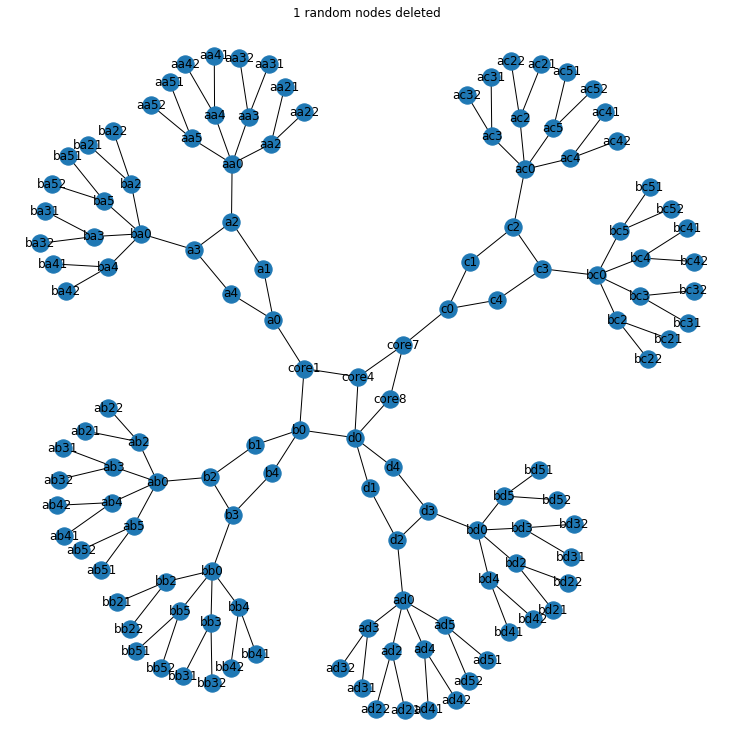

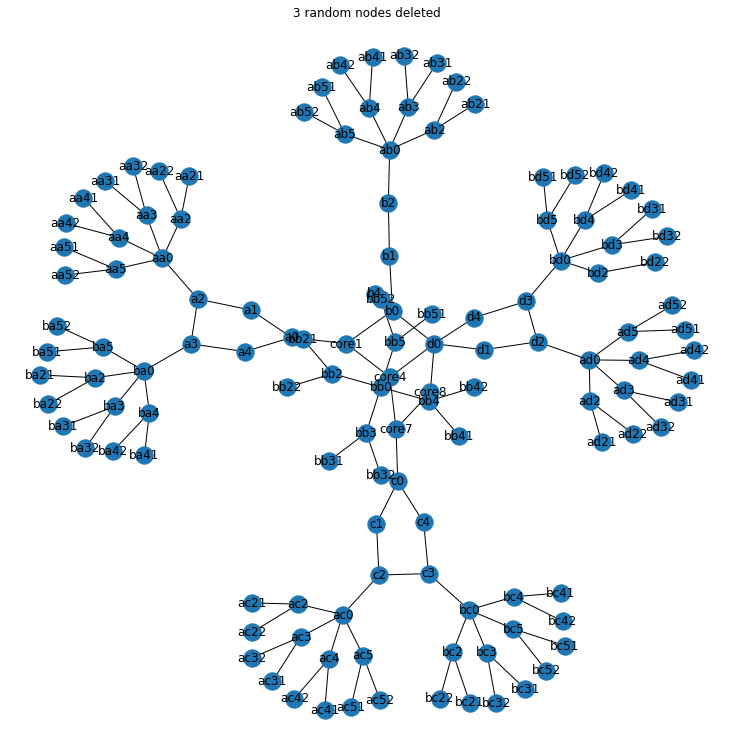

In [142]:
#Skriv koden her

cg.delete_random_nodes().draw()
plt.title('1 random nodes deleted')

cg.delete_random_nodes(3).draw()
plt.title('3 random nodes deleted')


In [143]:
# Forklaring her



## Oppgave 3.3
Prøv å angripe nettverket ved å bruke en kombinasjon av logisk tenkning og verdiene fra oppgave 3.1. Oppgaven her er å gjøre så mye skade som mulig ved å fjerne tre noder.

For hver node du velger å fjerne, begrunn hvorfor.

<em> Her forventer vi at studenten har forstått oppgaven og velger å fjerne tre noder som er svært sentrale. Forventer å se begrunnelse/tankegang for hver node som fjernes. </em>

Removed node d0 using betweenness_centrality
Removed node a0 using betweenness_centrality
Removed node core4 using betweenness_centrality


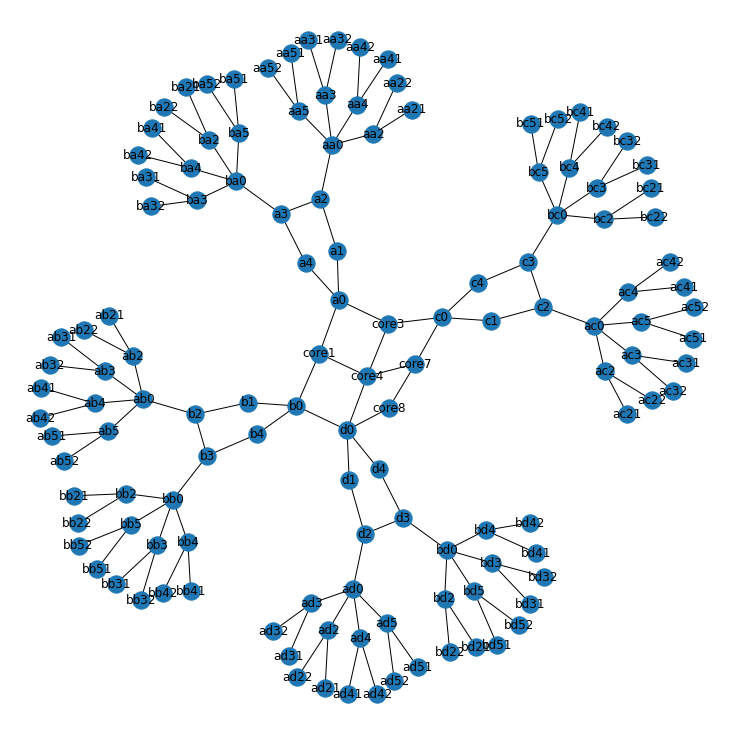

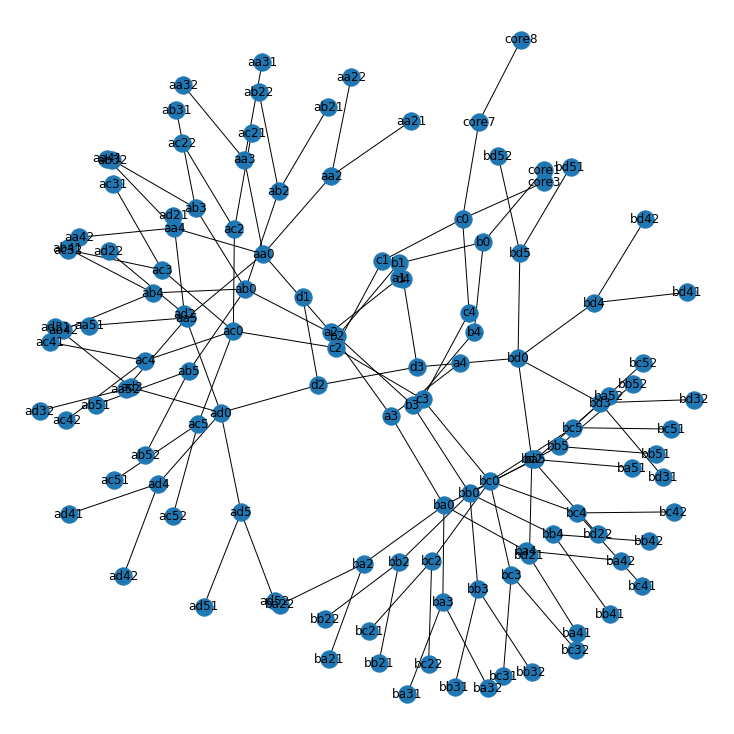

In [153]:
#Kode her

# constructed_graph.remove_nodes_from('d0')

cg.draw()
cg.delete_nodes_attack(3,"betweenness").draw()

## Oppgave 3.4
En måte å se hvor mye skade som har blitt gjort på et nettverk er å bruke noder i største partisjon, eller se på node degree ved hjelp av et histogram.

Bruk disse metodene på oppgave 3.2 og 3.3, og diskuter skadene ut ifra resultatene du nå har fått.

<em> Her forventer vi å se at studenten klarer å vise et histogram og klarer å bruke metoden for å finne noder i største partisjon. Vi forventer også å se en drøftning av konsekvensene i de to foregående oppgavene, og at studenten skjønner alvorligheten i målrettede angrep.</em>

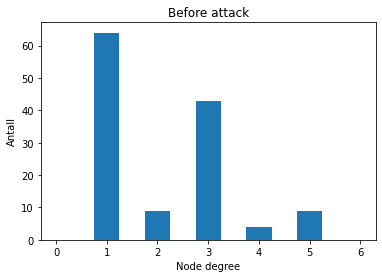

Removed node d0 using betweenness_centrality
Removed node a0 using betweenness_centrality
Removed node core4 using betweenness_centrality
Removed node ac0 using betweenness_centrality
Removed node ab0 using betweenness_centrality


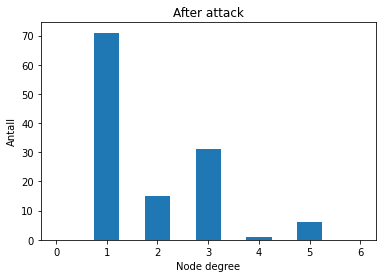

[0, 71, 15, 31, 1, 6]

In [162]:
#Kode her
# print("order:")
cg.order()
plt.title('Before attack')
cg.histogram()
plt.title('After attack')
cg.delete_nodes_attack(5,"betweenness").histogram()

In [37]:
# Forklar her

## Oppgave 3.5
Forklar hva som menes med begrepet noder i største partisjon. Hva kan være fordeler og ulemper ved å kun bruke noder i største partisjon og histogram som pålitelighetsmål? Er dette fornuftig i vårt tilfelle?

<em> Her forventer vi å se at studenten har forstått begrepet noder i største partisjon, og hvorfor dette kan brukes til å vise sårbarhet. Vi forventer også en drøftning av hvorfor/hvorfor ikke, det kan være lurt å bruke noder i største partisjon og histogram som de eneste pålitelighetsmålene.</em>

In [38]:
# Forklar her:



## Oppgave 3.6
Under ser du metoden for å lage en graf som sammenligner angrep med forskjellige metoder. Bruk metoden på det originale nettverket og sammenlign med det samme nettverket der du har lagt inn tre ekstra kanter som redundans. Diskuter kort effekten av ekstra redundans.

<em> Her forventer vi å se at studenten har klart å bruke metoden som er gitt til å vise skaden på det originale nettverket. Deretter forventer vi å se at studenten klarer å legge inn tre ekstra kanter, og begrunne hvorfor disse tre kantene er valgt. Til slutt vil vi se en kort diskusjon av effekten vi får av å legge til ekstra kanter i et nettverk.</em>

In [163]:
def get_attack_graph(G):
    count = G.number_of_nodes()
    outputs = [[0 for _ in range(count)] for _ in range(4)]
    graphs = [G for _ in range(4)]
    x = range(0,count)

    for i in x:
        for j, graph in enumerate(graphs):
            outputs[j][i] = graphs[j].get_largest_components_size()
        graphs[0] = graphs[0].delete_random_nodes(print_result=False)
        graphs[1] = graphs[1].delete_nodes_attack(centrality_index="degree",print_result=False)
        graphs[2] = graphs[2].delete_nodes_attack(centrality_index="closeness",print_result=False)
        graphs[3] = graphs[3].delete_nodes_attack(centrality_index="betweenness",print_result=False)

    bc1,bc2,bc3,bc4 = outputs
    plt.plot(x,bc1,color="red",label="Random faults")
    plt.plot(x,bc2,color="green",label="Degree centrality")
    plt.plot(x,bc3,color="blue",label="Closeness Centrality")
    plt.plot(x,bc4,color="orange", label="Betweenness Centrality")
    plt.ylabel("Amount of nodes in largest partition")
    plt.xlabel("Amount of nodes in removed")
    plt.legend(loc="upper right")
    plt.show()


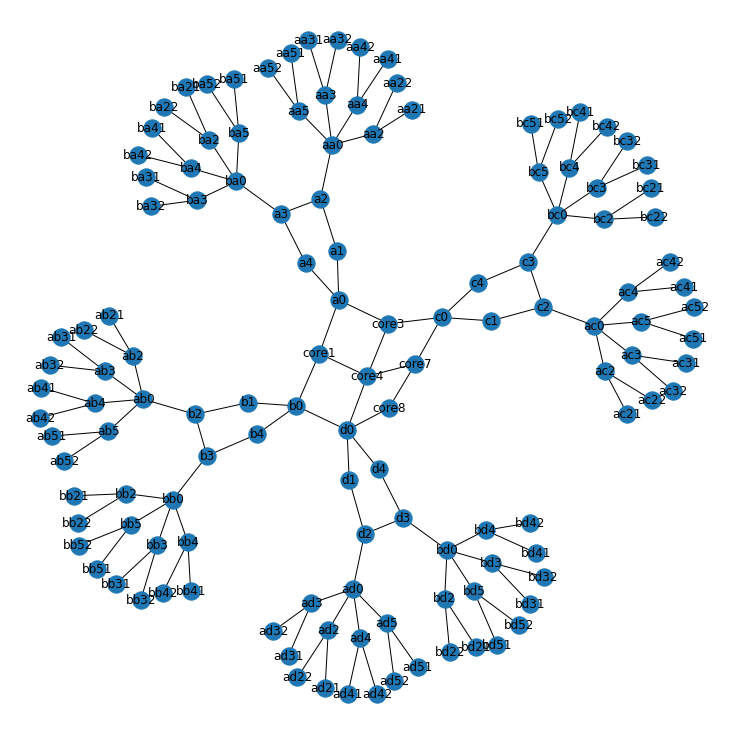

In [165]:
cg.draw()

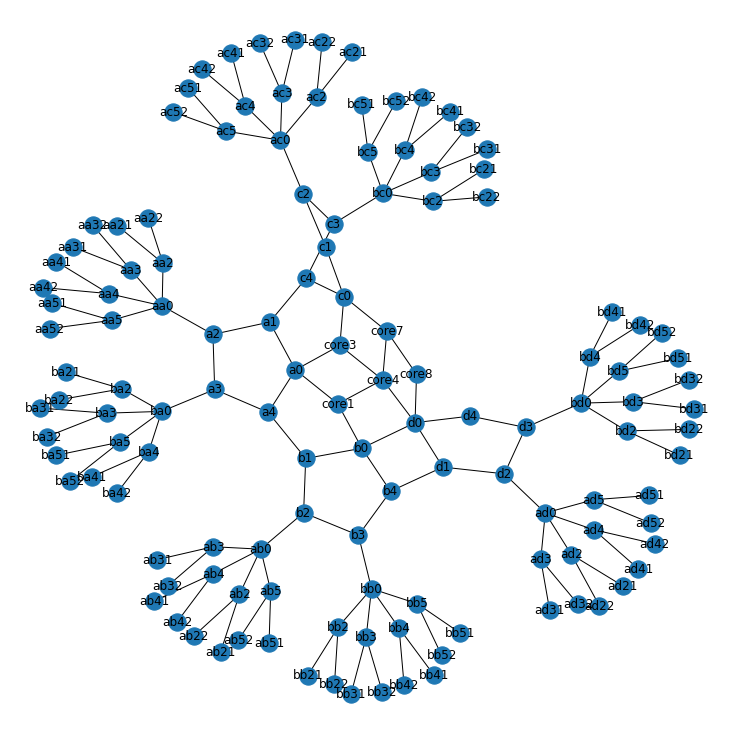

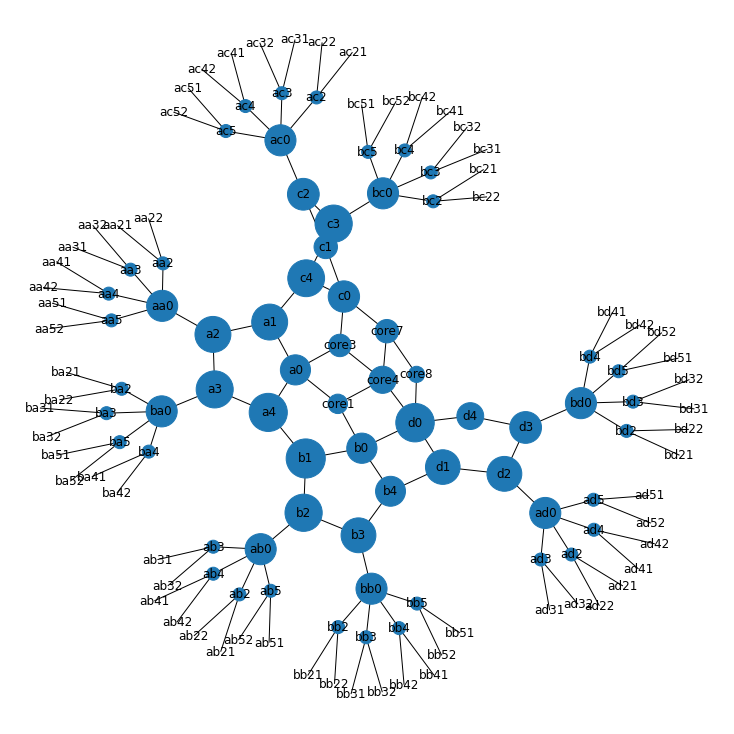

In [181]:
cg_improved = cg.copy()
# cg_improved.add_edges_from([('core8', 'd4'), ('core7', 'c4'), ('core1', 'a4')])
cg_improved.add_edges_from([('b4', 'd1'), ('b1', 'a4'), ('a1', 'c4')])

cg_improved.draw()
cg_improved.draw_betweenness_centrality()


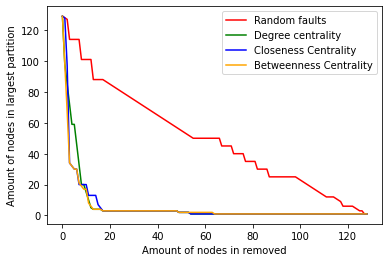

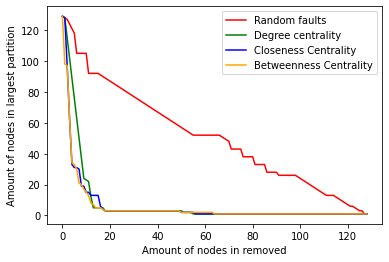

In [179]:
get_attack_graph(cg)
get_attack_graph(cg_improved)


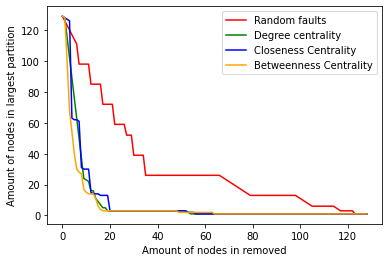

In [183]:
get_attack_graph(cg_improved)


# Del 4: Sikring av VDES

Du er nå ansatt som en sikkerhetsingeniør i VDES; og har som oppgave å sikrenettverket mot angrep, både mot ondsinnede handlinger og tilfeldige feil . Her er det viktig å analysere nettverket, finne low-hanging fruits og legge på ekstra redundans der det trengs, uten at kostnadene skal bli unødvendig høye. Bruk metodene som er lært i øvingen for å analysere og sikre nettverket. Forklar dine valg. Drøft konsekvensene av at ondsinnede aktører får tak i informasjonen rundt nettverket ditt. 

Analysen skal vise en gjennomgående forståelse av grafteori og grafteoretisk strukturell analyse. Bruk av fagbegreper og relevante begreper blir vektlagt. Oppgaven skal være kort og konsis og maks 800 ord. Start oppgaven med et bilde av nettverket og vis til figurer, histogrammer og grafer hvordan du vil sikre nettverket. Utforsk gjerne med å legge til redundans, teste angrep og vurdere tiltakene med histogram over node degree. Inkluder robusthetsgrafen og bruk den for å se på effekten. Bruk koden og resultatene som dokumentasjon for tiltakene og hva din anbefaling blir til VDES selskapet.

Netverket du skal analysere finner du vek å kjøre kodeblokken under:

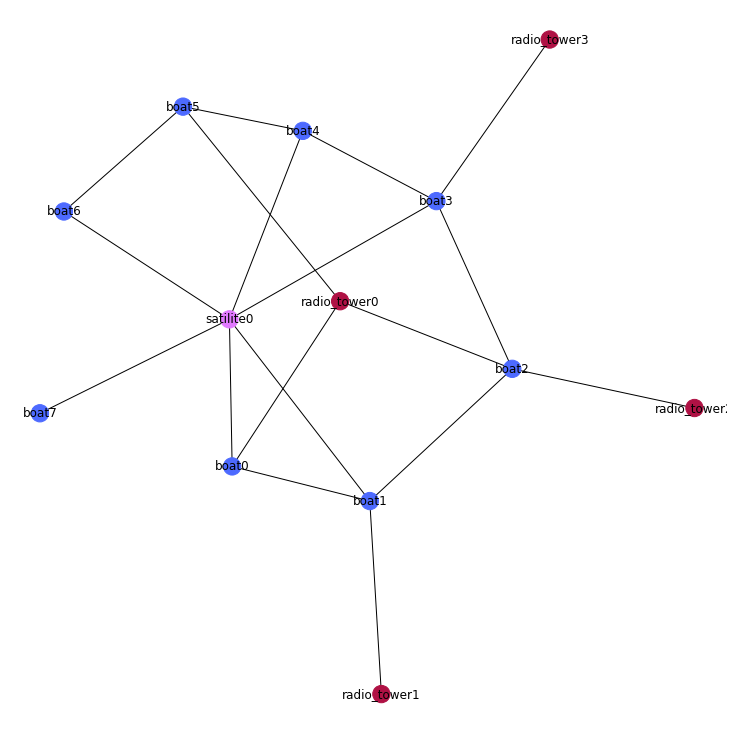

In [40]:
r.seed(student_seed)
boat_count = r.randint(4,9)
satellite_count = r.randint(1,3)
radio_tower_count = r.randint(2,5)

vdesGraph = VDESGraph(boat_count,satellite_count,radio_tower_count)
vdesGraph.draw()